In [158]:
%matplotlib inline 

import pickle as pkl 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt




In [159]:
from tensorflow.examples.tutorials.mnist import input_data
mnist  = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [160]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    return inputs_real, inputs_z

In [161]:
def generator(z, out_dim, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        h1 = tf.layers.dense(z, n_units, activation=None)
        h1 = tf.maximum(alpha * h1, h1) # Leaky ReLU
        
        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.tanh(logits) # -1 ` 1
#        out = tf.sigmoid(logits)
        
        return out
    

In [162]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        h1 = tf.layers.dense(x, n_units, activation=None)
        h1 = tf.maximum(alpha*h1, h1)
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits) # 0 ~ 1
        
        return out, logits
    

In [163]:
# hyperparamator initialize

input_size = 28*28 # 784
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01
smooth = 0.1


In [164]:
# define graph

tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)

g_model = generator(input_z, input_size, n_units=g_hidden_size, alpha=alpha)
d_model_real, d_logits_real = discriminator(input_real, n_units=d_hidden_size, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, n_units=d_hidden_size, alpha=alpha)


In [165]:
# define loss function

# minimize cross entoropy


# error with 1 (- smooth)
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                     labels=tf.ones_like(d_logits_real) * (1 - smooth)))
# error with 0
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                     labels=tf.zeros_like(d_logits_real)))
             
d_loss = d_loss_real + d_loss_fake

# error with answer(1)
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                     labels=tf.ones_like(d_logits_fake)))


In [166]:
# define Optimization
learning_rate = 0.002

t_vars = tf.trainable_variables() # get weight bias
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)



In [167]:
# bacth_size 
# make Real Fake DATA
# D,G Opt
# Loss 
## Epochs num Loop

batch_size = 100
batch = mnist.train.next_batch(batch_size)


In [168]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([6, 9, 9, 1, 0, 7, 7, 8, 1, 1, 0, 9, 1, 5, 3, 6, 2, 7, 6, 4, 2, 2,
        7, 3, 0, 3, 9, 9, 5, 6, 1, 1, 4, 7, 0, 0, 3, 7, 0, 2, 6, 7, 8, 4,
        6, 3, 5, 3, 5, 7, 4, 2, 7, 0, 2, 7, 8, 2, 1, 5, 5, 3, 6, 2, 4, 5,
        9, 6, 2, 7, 9, 4, 5, 2, 6, 2, 1, 6, 8, 5, 2, 1, 6, 8, 8, 9, 9, 5,
        5, 7, 7, 2, 4, 8, 4, 1, 0, 6, 8, 4], dtype=uint8))

In [169]:
batch[1][0]

6

In [170]:
batch[0][1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [171]:
batch[0][0]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.7490196, 1.       , 0.7490196, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [172]:
len(batch)

2

In [173]:
len(batch)

2

# トレーニングの実行

In [174]:
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list=g_vars)

with tf.Session() as sess: # Session
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size) # 100 個のデータを取り出す
            
            batch_images = batch[0].reshape((batch_size, 784)) # 100 * 784個分
            batch_images = batch_images * 2 - 1 # 0`~1 -> -1 ~ 1
            
            #Generator
            batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            # update parameter & opt
            _ = sess.run(d_train_optimize, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_optimize, feed_dict={input_z: batch_z})
            
        train_loss_d = sess.run(d_loss, {input_real: batch_images, input_z: batch_z})
        train_loss_g = g_loss.eval({input_z: batch_z})
        
        print("Epoch:   {}/{}".format(e+1, epochs),
              "D Loss: {:.4f}".format(train_loss_d),
              "G Loss: {:.4f}".format(train_loss_g))
        
        losses.append((train_loss_d, train_loss_g))
        
        sample_z = np.random.uniform(-1, 1, size=(16, z_size))
        gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                              feed_dict={input_z: sample_z})
        samples.append(gen_samples)
        saver.save(sess, './checkpoints/generator.ckpt')
        
with open('training_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)
        

Epoch:   1/100 D Loss: 0.3664 G Loss: 3.6854
Epoch:   2/100 D Loss: 0.4110 G Loss: 3.0873
Epoch:   3/100 D Loss: 0.3804 G Loss: 3.5622
Epoch:   4/100 D Loss: 0.5676 G Loss: 3.2455
Epoch:   5/100 D Loss: 0.8089 G Loss: 5.9340
Epoch:   6/100 D Loss: 0.8826 G Loss: 3.3496
Epoch:   7/100 D Loss: 1.1585 G Loss: 2.9047
Epoch:   8/100 D Loss: 0.6267 G Loss: 6.2217
Epoch:   9/100 D Loss: 0.9052 G Loss: 2.2851
Epoch:   10/100 D Loss: 0.9584 G Loss: 3.4002
Epoch:   11/100 D Loss: 1.2816 G Loss: 2.2542
Epoch:   12/100 D Loss: 0.9973 G Loss: 1.7336
Epoch:   13/100 D Loss: 1.2921 G Loss: 1.9362
Epoch:   14/100 D Loss: 0.7794 G Loss: 3.0554
Epoch:   15/100 D Loss: 1.1919 G Loss: 1.3284
Epoch:   16/100 D Loss: 1.3430 G Loss: 1.5238
Epoch:   17/100 D Loss: 0.7674 G Loss: 2.2262
Epoch:   18/100 D Loss: 0.7821 G Loss: 3.4168
Epoch:   19/100 D Loss: 0.9563 G Loss: 1.8575
Epoch:   20/100 D Loss: 1.6226 G Loss: 1.5866
Epoch:   21/100 D Loss: 0.7748 G Loss: 2.2305
Epoch:   22/100 D Loss: 0.9140 G Loss: 2.43

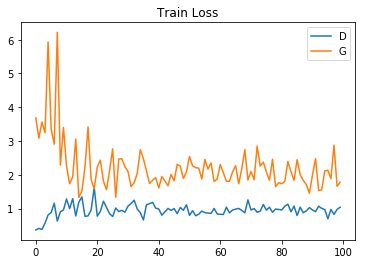

In [175]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='D')
plt.plot(losses.T[1], label='G')
plt.title('Train Loss')
plt.legend()

In [176]:
## transform data to image and display 

In [177]:
def view_samples(epoch,samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        
    return fig, axes

In [178]:
with open('training_samples.pkl', 'rb') as f:
    samples = pkl.load(f)


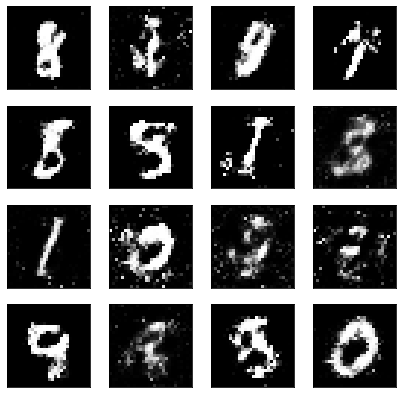

In [179]:
_ = view_samples(-1, samples)

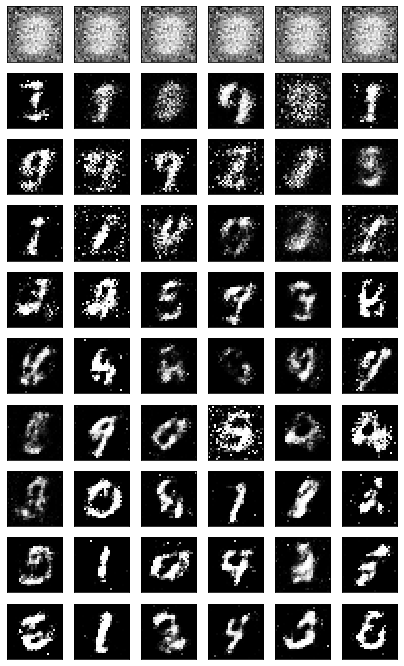

In [190]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7, 12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

## generator image by machine from.ckp

INFO:tensorflow:Restoring parameters from checkpoints\generator.ckpt


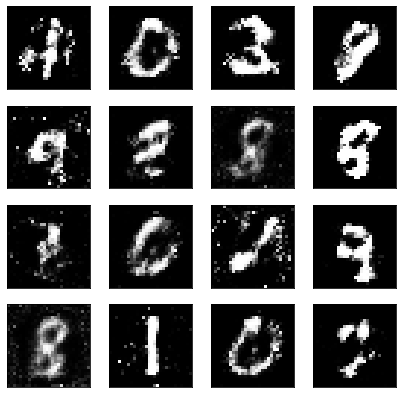

In [182]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1, 1, size=(16, z_size))
    gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                          feed_dict={input_z: sample_z})
_ = view_samples(0, [gen_samples])

